<a href="https://colab.research.google.com/github/LaiTechTinker/Datascinceproject/blob/main/Block_intel_onchain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Let first Load our dataset folder from our google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


THIS READ ALL THE FILES IN THE FOLDER THEN KEEPS ALL THE FILES PATH INTO ONE ARRAY


In [ ]:
filepath='/content/drive/My Drive/Block_intel_data/Onchaindata'
import os
import pandas as pd
arr=[]
for f in os.listdir(filepath):
  arr.append(os.path.join(filepath,f))




WE THEN CONCATE EACH FILES INTOON BIG DATAFRAME

In [ ]:
df=pd.concat((pd.read_csv(files) for files in arr),ignore_index=True)
print(df.shape)
df[150:250]

(550, 13)


,token,contractAgeDays,creator,contractVerified,pctTop10,top10Holders,renouncedOwnership,liquidityPool,liquidityUSD,liquidityLockedPct,lockDurationDays,devRecentLargeSells,txVolume24h
150,0xb9ef770b6a5e12e45983c5d80545258aa38f3b78,2653.60,0xf0d85b3858764e9540c3fdade38a7e3c410c4b16,verified,NaN,[],False,uniswap,890622.352809,0.8,180,False,918202
151,0xabd601423a2cd5723cb546acc5c40fb01c3422cf,688.68,0x22e3142bfbbe783965c9a0165db8799a246d66c4,verified,NaN,[],True,uniswap,335859.909145,0.8,180,False,323767
152,0x6fb0855c404e09c47c3fbca25f08d4e41f9f062f,2066.11,0x2fbb0c60a41cb7ea5323071624dcead3d213d0fa,verified,NaN,[],NaN,uniswap,949208.304352,0.8,180,False,970665
153,0x6ee0f7bb50a54ab5253da0667b0dc2ee526c30a8,1988.24,0xce990b1f86e954746ad3a57f5aa6cfa9cc0c3348,verified,NaN,[],NaN,uniswap,879233.946267,0.8,180,False,10107
154,0xcc8e21f599995d1c8367054841b8af5024ddf01b,769.08,0x3200bfdafe1988f343f4fd379b7797a19ae49c1b,verified,NaN,[],False,uniswap,475707.052372,0.8,180,False,390397
...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,0x1982b2f5814301d4e9a8b0201555376e62f82428,1285.13,0x2a61d3ba5030ef471c74f612962c7367eca3a62d,verified,NaN,[],NaN,uniswap,177546.295477,0.8,180,True,703005
246,0xa64bd6c70cb9051f6a9ba1f163fdc07e0dfb5f84,2066.12,0x2fbb0c60a41cb7ea5323071624dcead3d213d0fa,verified,NaN,[],NaN,uniswap,277882.926691,0.8,180,False,75772
247,0x6c5024cd4f8a59110119c56f8933403a539555eb,1738.21,0xbd723fc4f1d737dcfc48a07fe7336766d34cad5f,verified,NaN,[],NaN,uniswap,258142.434981,0.8,180,False,833085
248,0x328c4c80bc7aca0834db37e6600a6c49e12da4de,2066.11,0x2fbb0c60a41cb7ea5323071624dcead3d213d0fa,verified,NaN,[],NaN,uniswap,90641.752007,0.8,180,False,142519


In [ ]:
print(list(df.columns))

['token', 'contractAgeDays', 'creator', 'contractVerified', 'pctTop10', 'top10Holders', 'renouncedOwnership', 'liquidityPool', 'liquidityUSD', 'liquidityLockedPct', 'lockDurationDays', 'devRecentLargeSells', 'txVolume24h']


In [ ]:
new_df=df.drop(["token","pctTop10","top10Holders","creator"],axis=1)
new_df.head()

,contractAgeDays,contractVerified,renouncedOwnership,liquidityPool,liquidityUSD,liquidityLockedPct,lockDurationDays,devRecentLargeSells,txVolume24h
0,459.38,verified,False,uniswap,407110.778172,0.8,180,False,587083
1,669.23,verified,False,uniswap,898079.008520,0.8,180,False,403745
2,323.32,verified,NaN,uniswap,63187.933241,0.8,180,True,433685
3,926.41,verified,NaN,uniswap,968020.524853,0.8,180,False,696574
4,2065.25,verified,NaN,uniswap,685493.326864,0.8,180,False,786777


In [ ]:
print(new_df["liquidityPool"].unique())

['uniswap']


In [ ]:
new_df= new_df.loc[:,new_df.nunique()>1]
print(new_df.shape)


(550, 6)


In [ ]:
new_df.head()

,contractAgeDays,contractVerified,renouncedOwnership,liquidityUSD,devRecentLargeSells,txVolume24h
0,459.38,verified,False,407110.778172,False,587083
1,669.23,verified,False,898079.008520,False,403745
2,323.32,verified,NaN,63187.933241,True,433685
3,926.41,verified,NaN,968020.524853,False,696574
4,2065.25,verified,NaN,685493.326864,False,786777


In [ ]:
import numpy as np
# print(new_df["renouncedOwnership"].isnull().sum())# number of null value in this
value_counts=new_df["renouncedOwnership"].value_counts(normalize=True)
# new_df["renouncedOwnership"].fillna( np.random.choice(value_counts.index, size=new_df["renouncedOwnership"].isna().sum(), p=value_counts.values))
mask = new_df["renouncedOwnership"].isna()  # locate NaN rows
new_df.loc[mask, "renouncedOwnership"] = np.random.choice(
    value_counts.index,
    size=mask.sum(),
    p=value_counts.values
)


In [ ]:
print(new_df["contractVerified"].value_counts())

contractVerified
verified      544
unverified      6
Name: count, dtype: int64


NOW LET'S ONE-HOT ENCODE THE TRUE OF FALSE VALUES

In [ ]:
# Convert booleans to 0/1
new_df[["devRecentLargeSells","renouncedOwnership"]] = (
    new_df[["devRecentLargeSells","renouncedOwnership"]].astype(int)
)

df_encode = new_df.copy()  # Already clean and numeric
df_encode["contractVerified"]=df_encode["contractVerified"].map({"verified":1,"unverified":0})
print(df_encode.columns.tolist())


['contractAgeDays', 'contractVerified', 'renouncedOwnership', 'liquidityUSD', 'devRecentLargeSells', 'txVolume24h']


In [ ]:
df_encode["contractAgeDays"].dtype

dtype('float64')

In [ ]:

# Define bins and labels
bins = [0, 30, 180, 365, float("inf")]
labels = ["new", "young", "established", "long_term"]
# Create categorical column
df_encode["AgeGroups"] = pd.cut(df_encode["contractAgeDays"], bins=bins, labels=labels)




In [ ]:
df_encode

,contractAgeDays,contractVerified,renouncedOwnership,liquidityUSD,devRecentLargeSells,txVolume24h,AgeGroups
0,459.38,1,0,407110.778172,0,587083,long_term
1,669.23,1,0,898079.008520,0,403745,long_term
2,323.32,1,0,63187.933241,1,433685,established
3,926.41,1,0,968020.524853,0,696574,long_term
4,2065.25,1,1,685493.326864,0,786777,long_term
...,...,...,...,...,...,...,...
545,330.21,1,0,5769.740967,0,146840,established
546,1492.43,1,0,177418.502177,1,482883,long_term
547,783.37,1,1,81247.984085,0,555074,long_term
548,707.19,1,1,960210.472139,0,286616,long_term


In [ ]:
df_encode["AgeGroups"].dtype

CategoricalDtype(categories=['new', 'young', 'established', 'long_term'], ordered=True, categories_dtype=object)

In [ ]:
test_df=df_encode.copy()

In [ ]:
new_df2=pd.get_dummies(test_df,columns=["AgeGroups"]).astype(int)
new_df2

,contractAgeDays,contractVerified,renouncedOwnership,liquidityUSD,devRecentLargeSells,txVolume24h,AgeGroups_new,AgeGroups_young,AgeGroups_established,AgeGroups_long_term
0,459,1,0,407110,0,587083,0,0,0,1
1,669,1,0,898079,0,403745,0,0,0,1
2,323,1,0,63187,1,433685,0,0,1,0
3,926,1,0,968020,0,696574,0,0,0,1
4,2065,1,1,685493,0,786777,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
545,330,1,0,5769,0,146840,0,0,1,0
546,1492,1,0,177418,1,482883,0,0,0,1
547,783,1,1,81247,0,555074,0,0,0,1
548,707,1,1,960210,0,286616,0,0,0,1


In [ ]:
last_df=new_df2.drop(["contractAgeDays"],axis=1)
last_df

,contractVerified,renouncedOwnership,liquidityUSD,devRecentLargeSells,txVolume24h,AgeGroups_new,AgeGroups_young,AgeGroups_established,AgeGroups_long_term
0,1,0,407110,0,587083,0,0,0,1
1,1,0,898079,0,403745,0,0,0,1
2,1,0,63187,1,433685,0,0,1,0
3,1,0,968020,0,696574,0,0,0,1
4,1,1,685493,0,786777,0,0,0,1
...,...,...,...,...,...,...,...,...,...
545,1,0,5769,0,146840,0,0,1,0
546,1,0,177418,1,482883,0,0,0,1
547,1,1,81247,0,555074,0,0,0,1
548,1,1,960210,0,286616,0,0,0,1


In [ ]:
final_df=last_df.copy()

In [ ]:
final_df["logtxVolume24h"] = np.sign(final_df["txVolume24h"]) * np.log1p(abs(final_df["txVolume24h"])) #this creates log of price to avoid skewness
final_df["liquidityUSD"] = np.log1p(final_df["liquidityUSD"]) #this creates log of liquidity to avoid skewness
final_df["change_liquidity_ratio"] = df["txVolume24h"] / (df["liquidityUSD"] + 1) # this handles abnormal spike between in price with small liquidity to indicate fraud
final_df

,contractVerified,renouncedOwnership,liquidityUSD,devRecentLargeSells,txVolume24h,AgeGroups_new,AgeGroups_young,AgeGroups_established,AgeGroups_long_term,logtxVolume24h,change_liquidity_ratio
0,1,0,12.916841,0,587083,0,0,0,1,13.282923,1.442068
1,1,0,13.708014,0,403745,0,0,0,1,12.908541,0.449565
2,1,0,11.053870,1,433685,0,0,1,0,12.980076,6.863306
3,1,0,13.783009,0,696574,0,0,0,1,13.453931,0.719585
4,1,1,13.437895,0,786777,0,0,0,1,13.575701,1.147751
...,...,...,...,...,...,...,...,...,...,...,...
545,1,0,8.660427,0,146840,0,0,1,0,11.897106,25.445606
546,1,0,12.086269,1,482883,0,0,0,1,13.087532,2.721702
547,1,1,11.305261,0,555074,0,0,0,1,13.226859,6.831765
548,1,1,13.774908,0,286616,0,0,0,1,12.565902,0.298493


In [ ]:
final_df.to_excel("cleaned_blockintel.xlsx", index=False)

In [ ]:
print(os.listdir())

['.config', 'drive', 'cleaned_blockintel.xlsx', 'sample_data']


  WE ARE DONE WITH THE DATA CLEANING PART NOW THE NEXT PART IS NOW FOR MODEL TRAINING

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix
X_train,X_test=train_test_split(final_df,test_size=0.2,random_state=42)
# print(X_train.shape)
# print(X_test.shape)
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
kmeans=KMeans(n_clusters=3,random_state=42,max_iter=50,n_init=10,tol=1e-4,verbose=0)
# model=kmeans.fit(X_train_scaled)
cluster=kmeans.fit_predict(X_train_scaled)
# Silhouette Score
silhouette_avg = silhouette_score(X_train_scaled, cluster)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.3664283917013376


In [ ]:
#let's print the clustering center poin and also the label of each data points and also how well they are closed to their clusters
print("cluster centers:",kmeans.cluster_centers_.shape)
print("cluster labels:",kmeans.labels_)
print(kmeans.inertia_)

cluster centers: (3, 11)
cluster labels: [0 0 1 0 1 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 1 0 0 2 0 0 0 0 1 0 0 0 0 0 0 2 2
 1 1 0 0 0 0 0 1 0 2 1 0 2 0 0 0 0 2 0 0 2 0 2 0 0 2 2 1 0 0 0 2 0 0 0 1 0
 1 0 0 0 0 1 0 0 2 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 0
 0 0 2 0 0 1 0 0 1 0 0 0 0 0 2 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 2 2 0 0 0 1 0 2 2 2 0 1 0 1 0 0 2 2 2 0 0 2 0 0 0 0 0 1 0 1 0 0 0 1 0 2
 0 0 0 0 0 2 2 2 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 2 2 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 2 0 0 0 2 0 0 0 0 0 0 0 0 0 1 2 0 0 1 0 0 0 0 0 0 0 2 2 0 1 0 0 0 0
 0 0 2 0 0 1 0 2 0 0 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 1
 0 1 0 0 0 0 0 2 0 2 2 0 0 2 0 0 0 2 0 2 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 2 2
 0 0 0 2 1 0 2 0 0 0 0 1 0 0 0 0 0 2 0 0 1 0 0 1 2 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 2 0 0 0 0 0 2 2 1 0 0 0 0 0 1 2 0 0 0 2 0 2 0 0 0 1 1 2 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 1 2 0 0 2 1 0 0 2 0 0 2 0 0 0 1 0 0 0 0 0 2 0 1 0]
3542.0319985309334


let's try out kmeans with diffrent random seed number to see if we can get better score. if score >0.5 good clustering 0.25-0.5 weak clustering less than 0.25 bad clustering

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

best_score = -1
best_seed = None
seed=[0, 21, 42, 99, 123]
init=[10,15,30,45,60]

for x,y in zip(seed,init):
    kmeans = KMeans(
        n_clusters=3,
        random_state=x,
        max_iter=300,   # increase iterations for better convergence
        n_init=y,      # more centroid initializations
        tol=1e-4,
        verbose=0
    )
    cluster = kmeans.fit_predict(X_train_scaled)
    score = silhouette_score(X_train_scaled, cluster)
    print(f"Seed {x}: Silhouette Score = {score:.4f}")
    print(f"init {y}: Silhouette Score = {score:.4f}")

    if score > best_score:
        best_score = score
        best_seed = x
        best_init=y

print("\nBest Silhouette Score:", best_score, "with seed:", best_seed, "with init:", best_init)


Seed 0: Silhouette Score = 0.3676
init 10: Silhouette Score = 0.3676
Seed 21: Silhouette Score = 0.3676
init 15: Silhouette Score = 0.3676
Seed 42: Silhouette Score = 0.3676
init 30: Silhouette Score = 0.3676
Seed 99: Silhouette Score = 0.3676
init 45: Silhouette Score = 0.3676
Seed 123: Silhouette Score = 0.3676
init 60: Silhouette Score = 0.3676

Best Silhouette Score: 0.3676324269587132 with seed: 0 with init: 10


NOW LET'S WITH PCA TO REDUCE DIMENSION TO SEE IF THE SCORE WILL INCREASE AND WE WILL ITERATIVELY SELECT THE NUMBER OF COMPONENTS

silhouette score of i:,1 is:,0.5903592770518853
silhouette score of i:,2 is:,0.5574960395491562
silhouette score of i:,3 is:,0.43939767293977505
silhouette score of i:,4 is:,0.5051937670893514
silhouette score of i:,5 is:,0.4843028185206712
silhouette score of i:,6 is:,0.4325235852358754
silhouette score of i:,7 is:,0.41308191565476204
silhouette score of i:,8 is:,0.40877249734188814
silhouette score of i:,9 is:,0.3719493304609175
silhouette score of i:,10 is:,0.3676324269587132


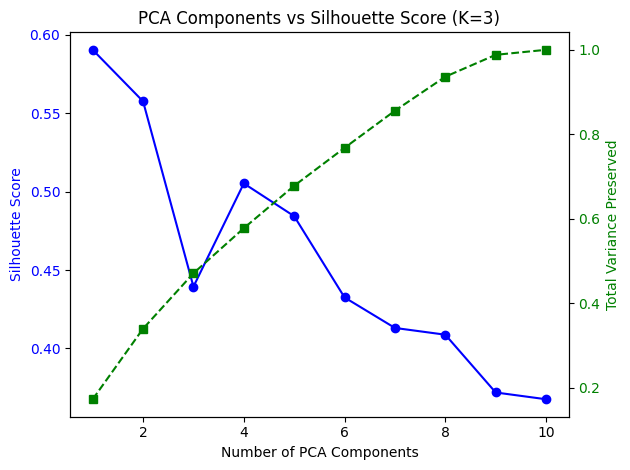

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
sil_scores=[]
explained_var=[]
Components=range(1,11)
for i in Components:
  model=PCA(n_components=i)
  X_pca=model.fit_transform(X_train_scaled)
  explained_var.append(sum(model.explained_variance_ratio_))
  # print(f"varinace ratio of i:  {i} is:{model.explained_variance_ratio_}")
  # print(f"total varinace preserved of i: {i} is: {sum(model.explained_variance_ratio_)}")
  kmeans = KMeans(
        n_clusters=3,
        random_state=21,
        max_iter=300,   # increase iterations for better convergence
        n_init=15,      # more centroid initializations
        tol=1e-4,
        verbose=0
    )
  cluster=kmeans.fit_predict(X_pca)
  score=silhouette_score(X_pca,cluster)
  sil_scores.append(score)
  print(f"silhouette score of i:,{i} is:,{score}")
fig, ax1 = plt.subplots()

# Plot silhouette scores
ax1.plot(Components, sil_scores, marker='o', color='b', label='Silhouette Score')
ax1.set_xlabel("Number of PCA Components")
ax1.set_ylabel("Silhouette Score", color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Plot explained variance on secondary y-axis
ax2 = ax1.twinx()
ax2.plot(Components, explained_var, marker='s', color='g', linestyle='--', label='Explained Variance')
ax2.set_ylabel("Total Variance Preserved", color='g')
ax2.tick_params(axis='y', labelcolor='g')

plt.title("PCA Components vs Silhouette Score (K=3)")
fig.tight_layout()
plt.show()

NOW LET'S DO HYPER PARAMETER TUNNING FOR EVRYTHING WE'VE DONE FOR MORE STRUCTURED CODE

In [ ]:
from sklearn.model_selection import ParameterGrid
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import pandas as pd

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(final_df)

#  Define hyperparameter search space
param_grid = {
    "pca__n_components": [None, 1, 2, 3, 4, 5, 6],  # None = no PCA
    "kmeans__n_init": [10, 30, 50],
    "kmeans__max_iter": [100, 300],
    "kmeans__random_state": [0, 21, 42],
    "kmeans__tol": [1e-4, 1e-3]
}

#Storage for results
results = []

# --- Hyperparameter tuning loop
for params in ParameterGrid(param_grid):
    # Step 1: PCA (optional)
    if params["pca__n_components"] is not None:
        pca = PCA(n_components=params["pca__n_components"])
        X_transformed = pca.fit_transform(X_scaled)
        var_preserved = sum(pca.explained_variance_ratio_)
    else:
        X_transformed = X_scaled
        var_preserved = 1.0  # no reduction

    # Step 2: KMeans
    kmeans = KMeans(
        n_clusters=3,
        random_state=params["kmeans__random_state"],
        max_iter=params["kmeans__max_iter"],
        n_init=params["kmeans__n_init"],
        tol=params["kmeans__tol"],
        verbose=0
    )
    cluster_labels = kmeans.fit_predict(X_transformed)

    # Step 3: Metrics
    sil = silhouette_score(X_transformed, cluster_labels)
    calinski = calinski_harabasz_score(X_transformed, cluster_labels)
    davies = davies_bouldin_score(X_transformed, cluster_labels)

    # Store results
    results.append({
        "pca_n_components": params["pca__n_components"],
        "var_preserved": var_preserved,
        "n_init": params["kmeans__n_init"],
        "max_iter": params["kmeans__max_iter"],
        "random_state": params["kmeans__random_state"],
        "tol": params["kmeans__tol"],
        "silhouette_score": sil,
        "calinski_harabasz": calinski,
        "davies_bouldin": davies
    })

# Convert to DataFrame for easy analysis
results_df = pd.DataFrame(results)

# Sort by silhouette score (descending)
results_df = results_df.sort_values(by="silhouette_score", ascending=False)

results_df


,pca_n_components,var_preserved,n_init,max_iter,random_state,tol,silhouette_score,calinski_harabasz,davies_bouldin
8,1.0,0.170148,10,100,0,0.0010,0.590510,1454.722135,0.501819
22,1.0,0.170148,10,100,21,0.0010,0.590510,1454.722135,0.501819
36,1.0,0.170148,10,100,42,0.0010,0.590510,1454.722135,0.501819
134,1.0,0.170148,10,300,0,0.0010,0.590510,1454.722135,0.501819
148,1.0,0.170148,10,300,21,0.0010,0.590510,1454.722135,0.501819
...,...,...,...,...,...,...,...,...,...
203,NaN,1.000000,30,300,42,0.0010,0.364942,100.738226,1.507593
40,5.0,0.681793,10,100,42,0.0010,0.290953,153.690660,1.293761
33,5.0,0.681793,10,100,42,0.0001,0.290953,153.690660,1.293761
159,5.0,0.681793,10,300,42,0.0001,0.290953,153.690660,1.293761


In [ ]:
max_score=results_df["silhouette_score"].max()

In [ ]:
results_df[results_df["silhouette_score"]==max_score]

,pca_n_components,var_preserved,n_init,max_iter,random_state,tol,silhouette_score,calinski_harabasz,davies_bouldin
8,1.0,0.170148,10,100,0,0.001,0.59051,1454.722135,0.501819
22,1.0,0.170148,10,100,21,0.001,0.59051,1454.722135,0.501819
36,1.0,0.170148,10,100,42,0.001,0.59051,1454.722135,0.501819
134,1.0,0.170148,10,300,0,0.001,0.59051,1454.722135,0.501819
148,1.0,0.170148,10,300,21,0.001,0.59051,1454.722135,0.501819
162,1.0,0.170148,10,300,42,0.001,0.59051,1454.722135,0.501819


NOW let's do model evaluation with our scaled X_test

In [ ]:
from sklearn.model_selection import ParameterGrid
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import pandas as pd

# Scale the data
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test)
pca = PCA(n_components=1)
X_transformed=pca.fit_transform(X_test_scaled)
kmeans = KMeans(
        n_clusters=3,
        random_state=42,
        max_iter=100,
        n_init=10,
        tol=0.0010,
        verbose=0
    )
cluster_labels = kmeans.fit_predict(X_transformed)
print(silhouette_score(X_transformed, cluster_labels))


0.6119724603979957
